In [2]:
import tensorflow as tf
!pip install git+https://github.com/d2l-ai/d2l-en
!pip install scipy==1.7.3
from d2l import tensorflow as d2l
import numpy as np
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

  Cloning https://github.com/d2l-ai/d2l-en to /tmp/pip-req-build-0p9oxfqa
  Running command git clone --filter=blob:none --quiet https://github.com/d2l-ai/d2l-en /tmp/pip-req-build-0p9oxfqa
  Resolved https://github.com/d2l-ai/d2l-en to commit 1ca368db8523672f52c4e997b1e330aee013f1ce
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 40.2 MB/s eta 0:00:00
  Using cached scipy-1.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires f

  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (39.9 MB)
  Using cached numpy-1.22.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
arviz 0.15.1 requires scipy>=1.8.0, but you have scipy 1.7.3 which is incompatible.
d2l 1.0.3 requires nu

# Setting up

In [3]:

# Setting up
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train

x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.3, random_state = 1234)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# Normalizes the data
def normalize(x_train, y_train, x_test, y_test):
    # Normalizes the pixel data
    x_train = x_train/255
    x_test = x_test/255
    # One hot encoding the labels
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    # Flatting the data to one vector
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = normalize(x_train, y_train, x_test, y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# Function for building the model

def build_mlp_model(feature_size, unit_size, n_hidden_layers, opt_, loss_, activ):
    model = tf.keras.Sequential([tf.keras.layers.Dense(unit_size, activation = activ, input_shape = [feature_size])])
    for i in range(n_hidden_layers):
        model.add(tf.keras.layers.Dense(unit_size, activation = activ,
                                        kernel_initializer = tf.keras.initializers.HeUniform(),
                                        bias_initializer = tf.keras.initializers.Zeros(),
                                        kernel_regularizer = tf.keras.regularizers.L1L2(l1 = 1e-5, l2 = 1e-4),
                                        bias_regularizer = tf.keras.regularizers.L2(1e-4)))
    model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))
    model.compile(optimizer = opt_, loss = loss_, metrics = ['accuracy'])
    return model


11490434/11490434 [==============================] - 0s 0us/step


# Task 1

In [4]:
# Task 1: Compare 2-layer vs 3-layer vs 4-layer MLPs, with a 100 units each layer, using ReLU activation function.

# 2-layer MLP

# Adam optimizer with 2e-4 learning rate (nu)
n_hidden = 1
feature_size = 784
unit_size = 100
batch_size =32
epochs = 50
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 50)

relu_act = tf.nn.relu
adam_opt = tf.keras.optimizers.Adam(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

mlp_2layers = build_mlp_model(feature_size, unit_size, n_hidden, adam_opt, loss, relu_act)
mlp_2layers.summary()

# 2 dense layers, total of 89,610 parameters.
history_2layers =mlp_2layers.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))

hist_2  = pd.DataFrame(history_2layers.history)
hist_2['epoch'] = history_2layers.epoch
hist_2[['accuracy', 'val_accuracy']].tail(1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1532/1532 [==============================] - 12s 6ms/step - loss: 0.4957 - accuracy: 0.8748 - val_loss: 0.2802 - val_accuracy: 0.9265
Epoch 2/50
1532/1532 [==============================] - 10s 6ms/step - loss: 0.2304 - accuracy: 0.9426 - val_loss: 0.2123 - val_accuracy: 0.9475
Epoch 3/50
1532/1532 [====

,accuracy,val_accuracy
49,0.999714,0.975381


In [6]:

# Part b) 3-layer MLP

# 3 dense layers, total of 99,710 parameters
n_hidden = 2
relu_act = tf.nn.relu
adam_opt = tf.keras.optimizers.Adam(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()
mlp_3layers = build_mlp_model(feature_size, unit_size, n_hidden, adam_opt, loss, relu_act)
mlp_3layers.summary()

history_3layers =mlp_3layers.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))
hist_3  = pd.DataFrame(history_3layers.history)
hist_3['epoch'] = history_3layers.epoch
hist_3[['accuracy', 'val_accuracy']].tail(1)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1532/1532 [==============================] - 10s 4ms/step - loss: 0.4877 - accuracy: 0.8796 - val_loss: 0.2796 - val_accuracy: 0.9365
Epoch 2/50
1532/1532 [===============

,accuracy,val_accuracy
49,0.999204,0.975857


In [7]:

# Part c) 4-layer MLP

# 4 dense layers, total of 109,810 parameters
n_hidden = 3
relu_act = tf.nn.relu
adam_opt = tf.keras.optimizers.Adam(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()
mlp_4layers = build_mlp_model(feature_size, unit_size, n_hidden, adam_opt, loss, relu_act)
mlp_4layers.summary()

history_4layers =mlp_4layers.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))

hist_4 = pd.DataFrame(history_4layers.history)
hist_4['epoch'] = history_4layers.epoch
hist_4[['accuracy', 'val_accuracy']].tail(1)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 100)               10100     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 109,810
Trainable params: 109,810
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1532/1532 [==========================

,accuracy,val_accuracy
49,0.999347,0.97481


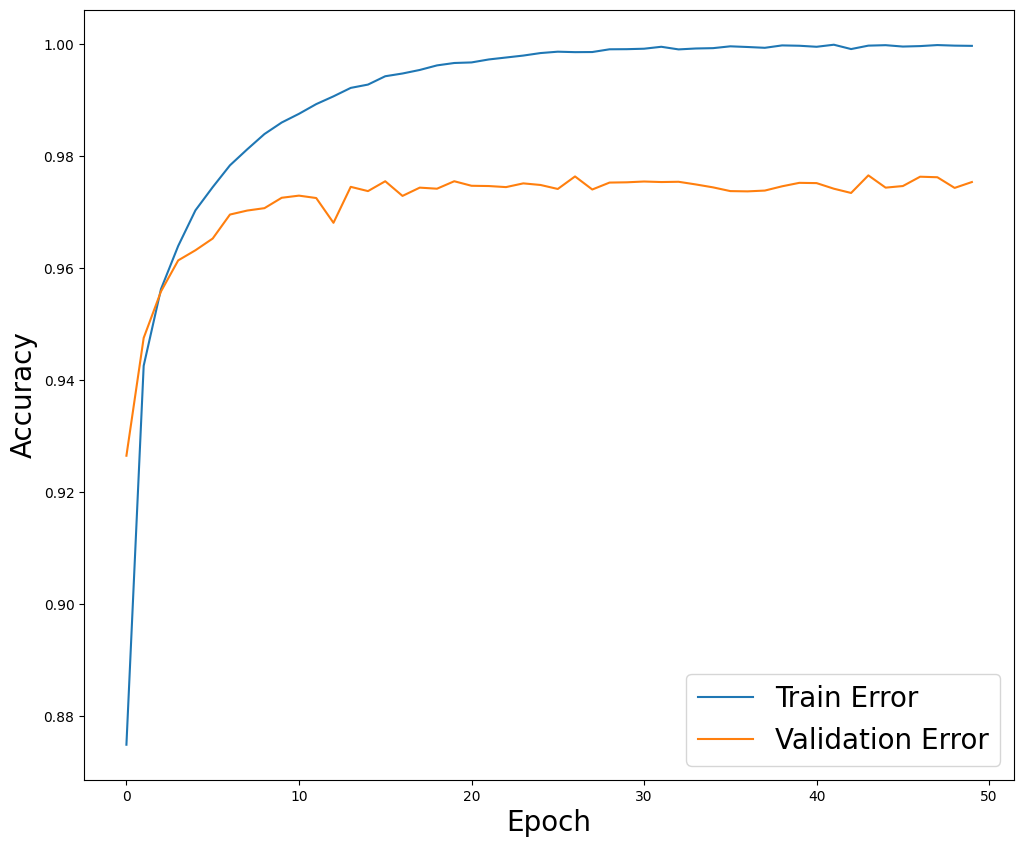

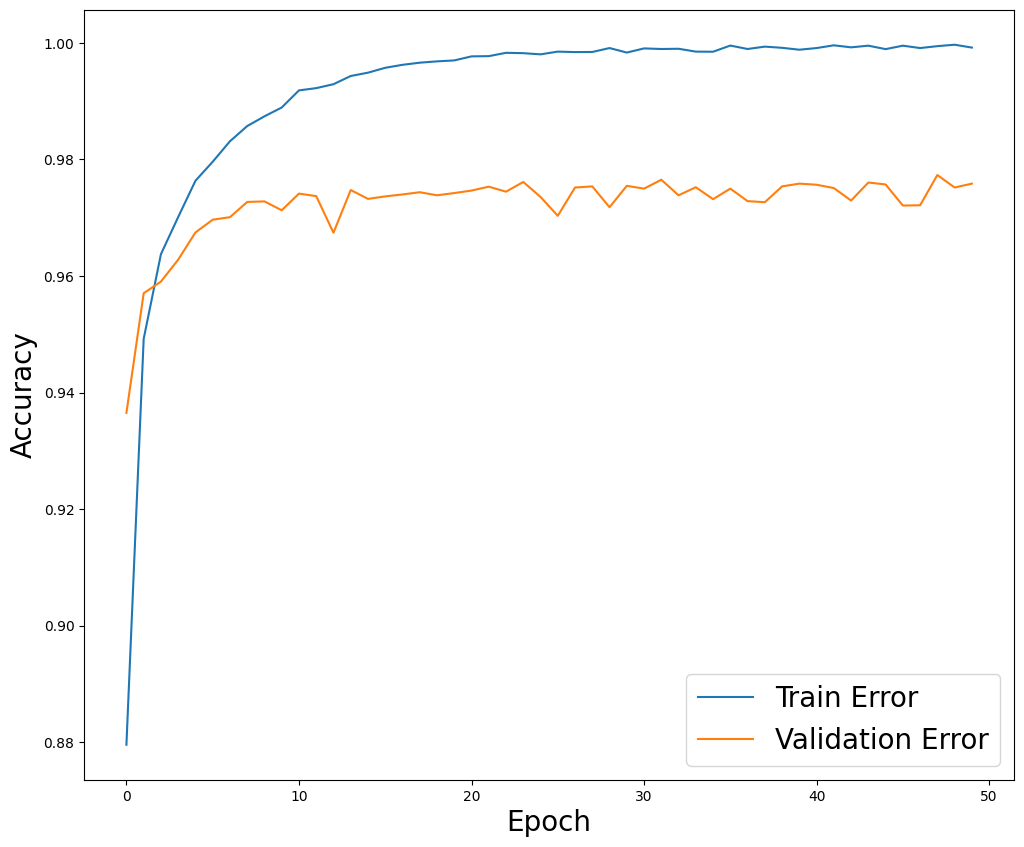

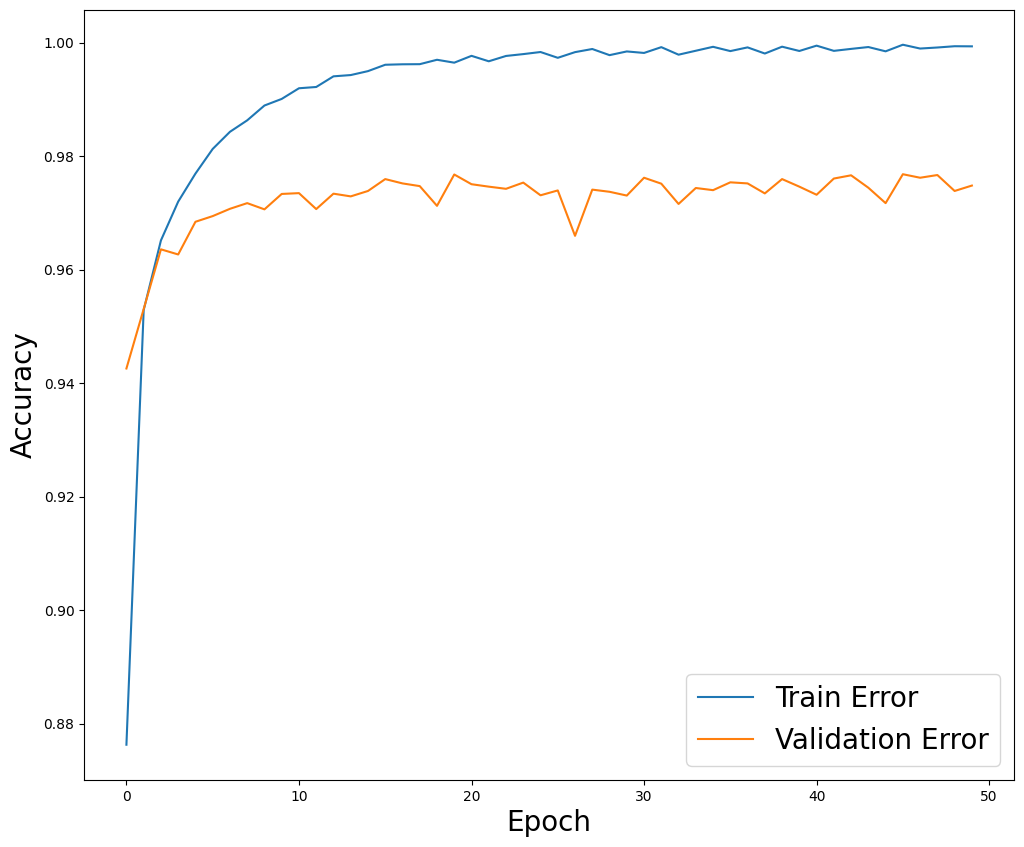

In [8]:

# Plots accuracy and validation accuracy over the epochs

def plot_history(hist_):
    plt.figure(figsize=(12, 10))
    plt.xlabel('Epoch',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.plot(hist_['epoch'], hist_['accuracy'], label='Train Error')
    plt.plot(hist_['epoch'], hist_['val_accuracy'], label = 'Validation Error')
    plt.legend(prop={'size': 20})



plot_history(hist_2)
plot_history(hist_3)
plot_history(hist_4)


# Task 2

In [9]:
# Task 2: Compare the performance of 2-layer MLP when using different settings.

# Testing model with different weight initializers

# Weights initialized to random normal distribution with the mean of 0 and standard deviation of 1

adam_opt = tf.keras.optimizers.Adam(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()
batch_size=32

ran_normal_model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(100, activation='relu', kernel_initializer = tf.keras.initializers.RandomNormal(mean = 0, stddev = 1, seed = 488)),
                tf.keras.layers.Dense(100, activation='relu', kernel_initializer = tf.keras.initializers.RandomNormal(mean = 0, stddev = 1, seed = 488)),
                tf.keras.layers.Dense(10, activation='softmax')])

ran_normal_model.compile(optimizer = adam_opt, loss = loss, metrics = ['accuracy'])

In [10]:
history_rannorm =ran_normal_model.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))

hist_randnorm = pd.DataFrame(history_rannorm.history)
hist_randnorm['epoch'] = history_rannorm.epoch
hist_randnorm[['accuracy', 'val_accuracy']].tail(1)


Epoch 1/50
1532/1532 [==============================] - 11s 7ms/step - loss: 17.6698 - accuracy: 0.5015 - val_loss: 5.9371 - val_accuracy: 0.7050
Epoch 2/50
1532/1532 [==============================] - 5s 4ms/step - loss: 4.4133 - accuracy: 0.7561 - val_loss: 3.3761 - val_accuracy: 0.7865
Epoch 3/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.7339 - accuracy: 0.8111 - val_loss: 2.3384 - val_accuracy: 0.8239
Epoch 4/50
1532/1532 [==============================] - 6s 4ms/step - loss: 1.9147 - accuracy: 0.8393 - val_loss: 1.7702 - val_accuracy: 0.8447
Epoch 5/50
1532/1532 [==============================] - 6s 4ms/step - loss: 1.4185 - accuracy: 0.8584 - val_loss: 1.4135 - val_accuracy: 0.8569
Epoch 6/50
1532/1532 [==============================] - 5s 4ms/step - loss: 1.0974 - accuracy: 0.8732 - val_loss: 1.1736 - val_accuracy: 0.8686
Epoch 7/50
1532/1532 [==============================] - 7s 5ms/step - loss: 0.8721 - accuracy: 0.8846 - val_loss: 0.9793 - val_accurac

,accuracy,val_accuracy
49,0.994224,0.943238


Epoch 1/50
1532/1532 [==============================] - 7s 4ms/step - loss: 2.3021 - accuracy: 0.1113 - val_loss: 2.3016 - val_accuracy: 0.1141
Epoch 2/50
1532/1532 [==============================] - 7s 5ms/step - loss: 2.3015 - accuracy: 0.1118 - val_loss: 2.3013 - val_accuracy: 0.1141
Epoch 3/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.3013 - accuracy: 0.1118 - val_loss: 2.3012 - val_accuracy: 0.1141
Epoch 4/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.3013 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy: 0.1141
Epoch 5/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.3013 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy: 0.1141
Epoch 6/50
1532/1532 [==============================] - 7s 5ms/step - loss: 2.3012 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy: 0.1141
Epoch 7/50
1532/1532 [==============================] - 7s 4ms/step - loss: 2.3012 - accuracy: 0.1118 - val_loss: 2.3011 - val_accuracy:

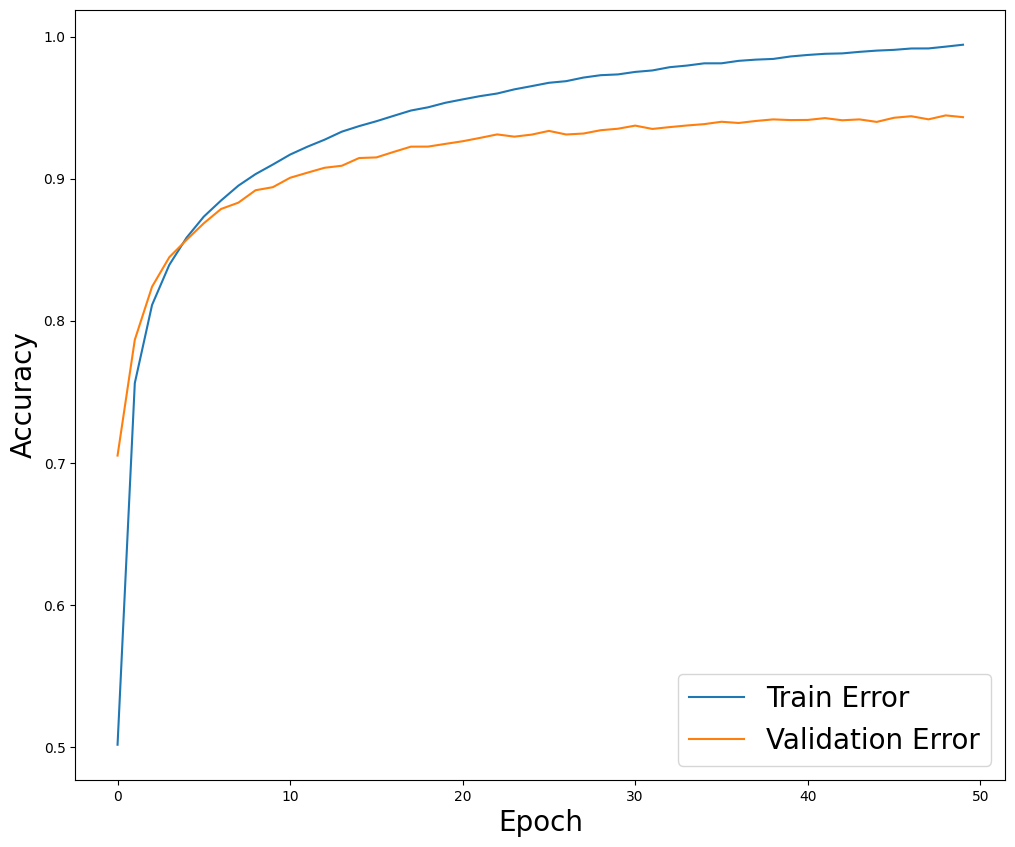

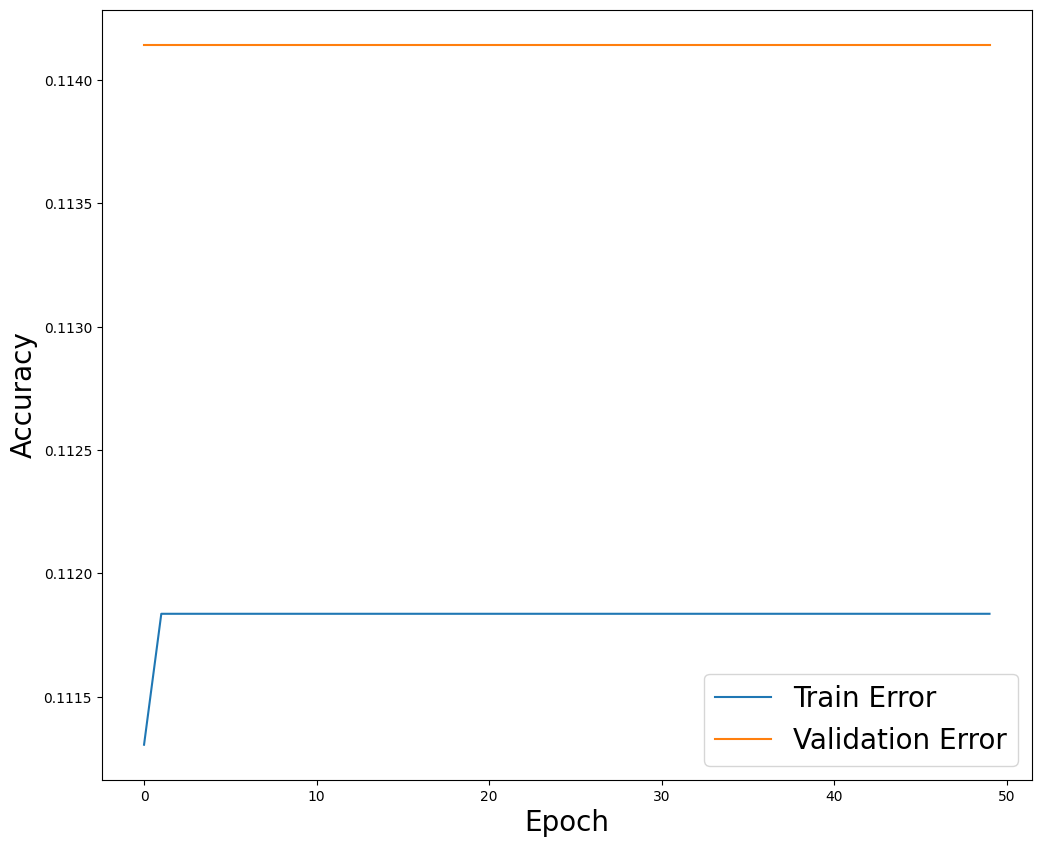

In [11]:

# Adam optimizer with 2e-4 learning rate (nu)
adam_opt = tf.keras.optimizers.Adam(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

zeros_model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(100, activation='relu', kernel_initializer = tf.keras.initializers.Zeros()),
                tf.keras.layers.Dense(100, activation='relu', kernel_initializer = tf.keras.initializers.Zeros()),
                tf.keras.layers.Dense(10, activation='softmax')])

zeros_model.compile(optimizer = adam_opt, loss = loss, metrics = ['accuracy'])
history_zeros=zeros_model.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))
hist_zeros = pd.DataFrame(history_zeros.history)
hist_zeros['epoch'] = history_zeros.epoch
hist_zeros[['accuracy', 'val_accuracy']].tail(1)

plot_history(hist_randnorm)
plot_history(hist_zeros)
print("The model whose weights are initialized to zero has lower accuracy than the random normal model. This is because the weights are initialized to zero and the model is struggling to learn.")


In [12]:
# Testing model with different regularizations
adam_opt = tf.keras.optimizers.Adam(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

# L1 Regularization

l1model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(100, activation='relu', kernel_regularizer = tf.keras.regularizers.L1(1e-5)),
                tf.keras.layers.Dense(100, activation='relu', kernel_regularizer = tf.keras.regularizers.L1(1e-5)),
                tf.keras.layers.Dense(10, activation='softmax')])
l1model.compile(optimizer = adam_opt, loss = loss, metrics = ['accuracy'])
history_l1model=l1model.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))
hist_l1model = pd.DataFrame(history_l1model.history)
hist_l1model['epoch'] = history_l1model.epoch
hist_l1model[['accuracy', 'val_accuracy']].tail(1)

Epoch 1/50
1532/1532 [==============================] - 12s 7ms/step - loss: 0.5135 - accuracy: 0.8731 - val_loss: 0.2860 - val_accuracy: 0.9272
Epoch 2/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.2421 - accuracy: 0.9393 - val_loss: 0.2230 - val_accuracy: 0.9447
Epoch 3/50
1532/1532 [==============================] - 7s 4ms/step - loss: 0.1945 - accuracy: 0.9529 - val_loss: 0.1952 - val_accuracy: 0.9534
Epoch 4/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1629 - accuracy: 0.9623 - val_loss: 0.1692 - val_accuracy: 0.9594
Epoch 5/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1419 - accuracy: 0.9679 - val_loss: 0.1561 - val_accuracy: 0.9638
Epoch 6/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1264 - accuracy: 0.9714 - val_loss: 0.1501 - val_accuracy: 0.9666
Epoch 7/50
1532/1532 [==============================] - 7s 4ms/step - loss: 0.1128 - accuracy: 0.9761 - val_loss: 0.1358 - val_accuracy

,accuracy,val_accuracy
49,0.999286,0.973905


Epoch 1/50
1532/1532 [==============================] - 9s 5ms/step - loss: 0.4898 - accuracy: 0.8767 - val_loss: 0.2740 - val_accuracy: 0.9293
Epoch 2/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.2311 - accuracy: 0.9407 - val_loss: 0.2157 - val_accuracy: 0.9465
Epoch 3/50
1532/1532 [==============================] - 7s 4ms/step - loss: 0.1820 - accuracy: 0.9551 - val_loss: 0.1746 - val_accuracy: 0.9576
Epoch 4/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1512 - accuracy: 0.9643 - val_loss: 0.1593 - val_accuracy: 0.9617
Epoch 5/50
1532/1532 [==============================] - 7s 5ms/step - loss: 0.1308 - accuracy: 0.9704 - val_loss: 0.1454 - val_accuracy: 0.9655
Epoch 6/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1160 - accuracy: 0.9756 - val_loss: 0.1357 - val_accuracy: 0.9688
Epoch 7/50
1532/1532 [==============================] - 7s 5ms/step - loss: 0.1046 - accuracy: 0.9782 - val_loss: 0.1299 - val_accuracy:

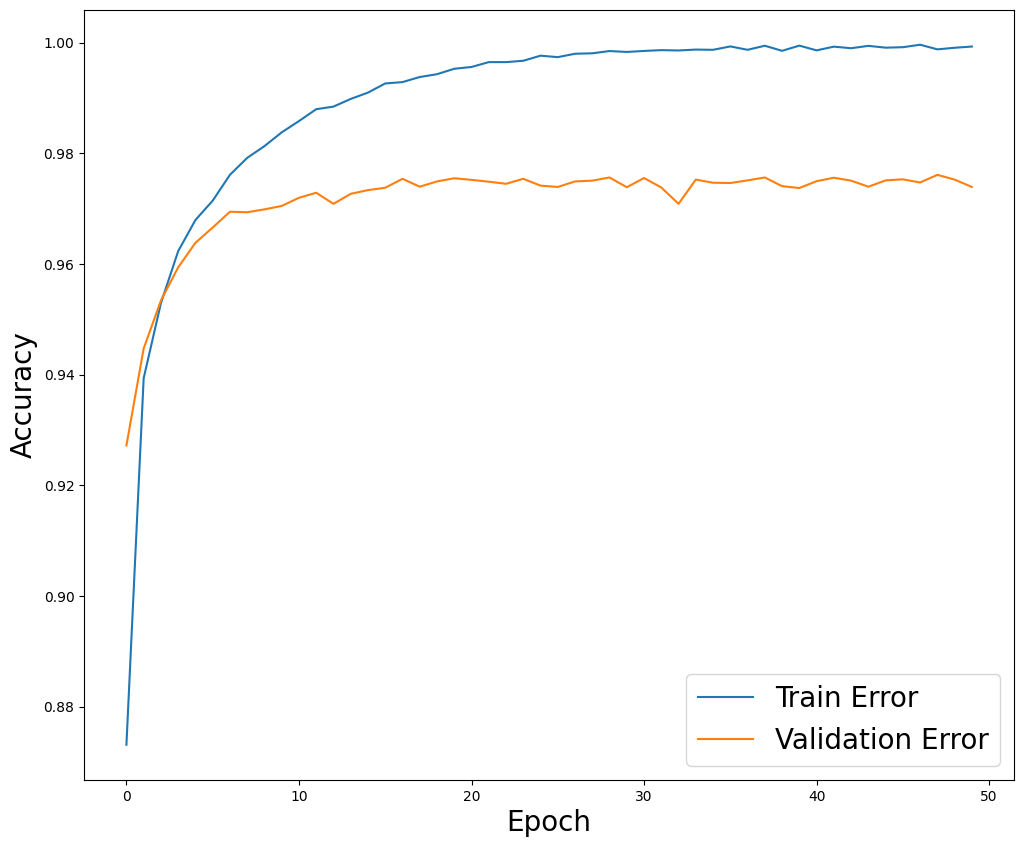

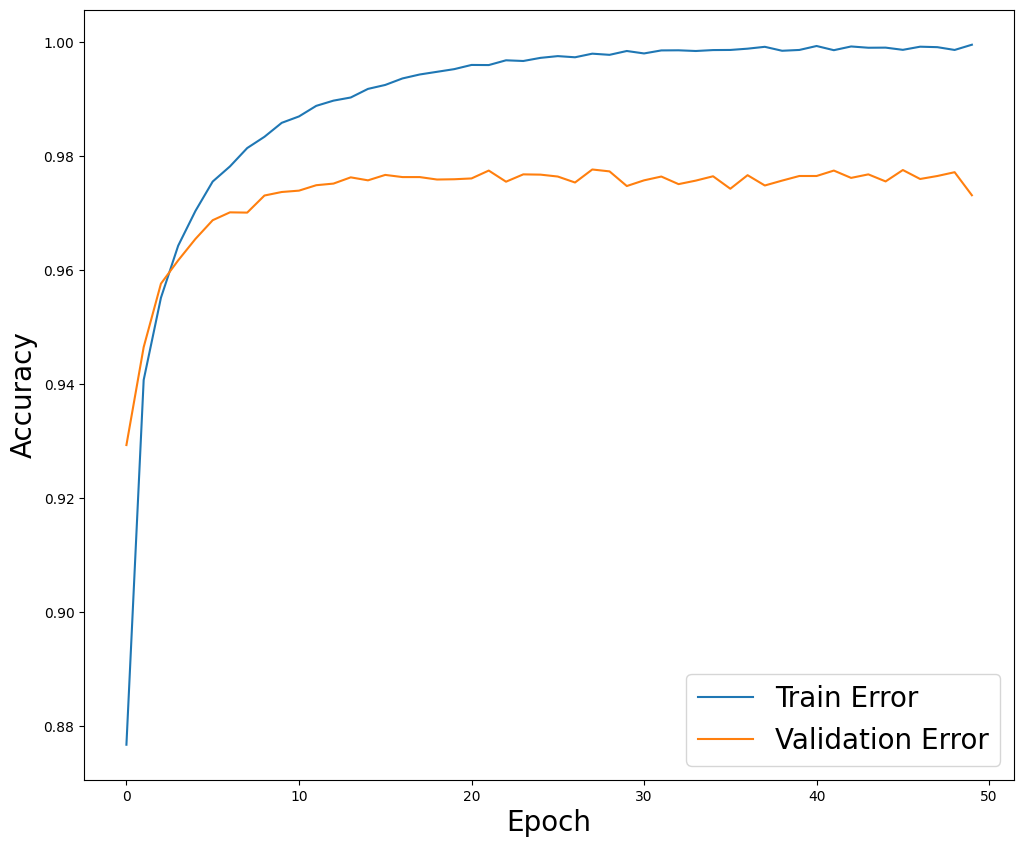

In [13]:

# L2 Regularization
adam_opt = tf.keras.optimizers.Adam(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

l2model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(100, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(1e-4)),
                tf.keras.layers.Dense(100, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(1e-4)),
                tf.keras.layers.Dense(10, activation='softmax')])
l2model.compile(optimizer = adam_opt, loss = loss, metrics = ['accuracy'])
history_l2model=l2model.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))
hist_l2model = pd.DataFrame(history_l2model.history)
hist_l2model['epoch'] = history_l2model.epoch
hist_l2model[['accuracy', 'val_accuracy']].tail(1)

plot_history(hist_l1model)
plot_history(hist_l2model)

In [14]:

# Models with different optimizers

# RMSPROP optimizer with 2e-4 learning rate (nu)
rms_prop = tf.keras.optimizers.RMSprop(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

rms_model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(100, activation='relu'),
                tf.keras.layers.Dense(100, activation='relu'),
                tf.keras.layers.Dense(10, activation='softmax')])

rms_model.compile(optimizer = rms_prop, loss = loss, metrics = ['accuracy'])
history_rms =rms_model.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))
hist_rms = pd.DataFrame(history_rms.history)
hist_rms['epoch'] = history_rms.epoch
hist_rms[['accuracy', 'val_accuracy']].tail(1)


Epoch 1/50
1532/1532 [==============================] - 7s 4ms/step - loss: 0.4765 - accuracy: 0.8761 - val_loss: 0.2573 - val_accuracy: 0.9250
Epoch 2/50
1532/1532 [==============================] - 5s 4ms/step - loss: 0.2173 - accuracy: 0.9373 - val_loss: 0.1984 - val_accuracy: 0.9422
Epoch 3/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1690 - accuracy: 0.9505 - val_loss: 0.1651 - val_accuracy: 0.9518
Epoch 4/50
1532/1532 [==============================] - 5s 4ms/step - loss: 0.1394 - accuracy: 0.9592 - val_loss: 0.1493 - val_accuracy: 0.9557
Epoch 5/50
1532/1532 [==============================] - 6s 4ms/step - loss: 0.1180 - accuracy: 0.9650 - val_loss: 0.1330 - val_accuracy: 0.9608
Epoch 6/50
1532/1532 [==============================] - 5s 3ms/step - loss: 0.1024 - accuracy: 0.9698 - val_loss: 0.1273 - val_accuracy: 0.9609
Epoch 7/50
1532/1532 [==============================] - 7s 4ms/step - loss: 0.0900 - accuracy: 0.9735 - val_loss: 0.1156 - val_accuracy:

,accuracy,val_accuracy
49,0.99951,0.974143


Epoch 1/50
1532/1532 [==============================] - 8s 5ms/step - loss: 2.3376 - accuracy: 0.0773 - val_loss: 2.3299 - val_accuracy: 0.0852
Epoch 2/50
1532/1532 [==============================] - 7s 5ms/step - loss: 2.3182 - accuracy: 0.0901 - val_loss: 2.3110 - val_accuracy: 0.1017
Epoch 3/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.2996 - accuracy: 0.1075 - val_loss: 2.2927 - val_accuracy: 0.1194
Epoch 4/50
1532/1532 [==============================] - 8s 5ms/step - loss: 2.2814 - accuracy: 0.1287 - val_loss: 2.2749 - val_accuracy: 0.1420
Epoch 5/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.2636 - accuracy: 0.1502 - val_loss: 2.2575 - val_accuracy: 0.1659
Epoch 6/50
1532/1532 [==============================] - 7s 5ms/step - loss: 2.2462 - accuracy: 0.1752 - val_loss: 2.2403 - val_accuracy: 0.1890
Epoch 7/50
1532/1532 [==============================] - 6s 4ms/step - loss: 2.2290 - accuracy: 0.2014 - val_loss: 2.2232 - val_accuracy:

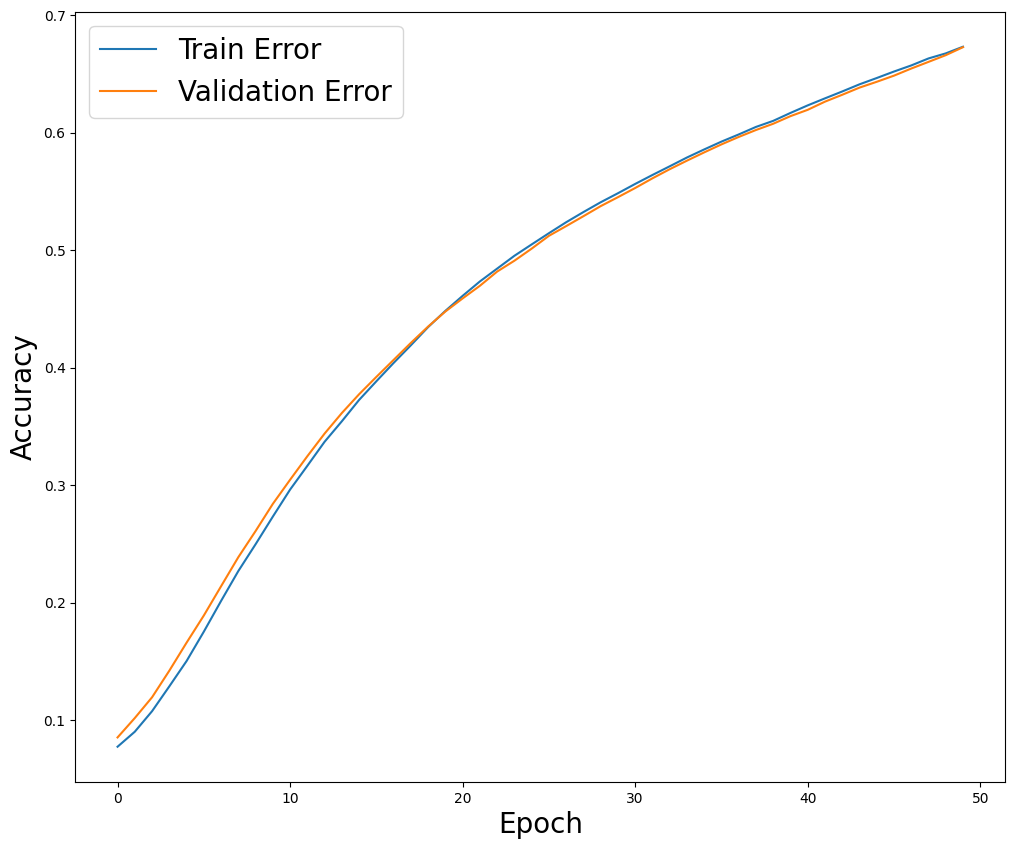

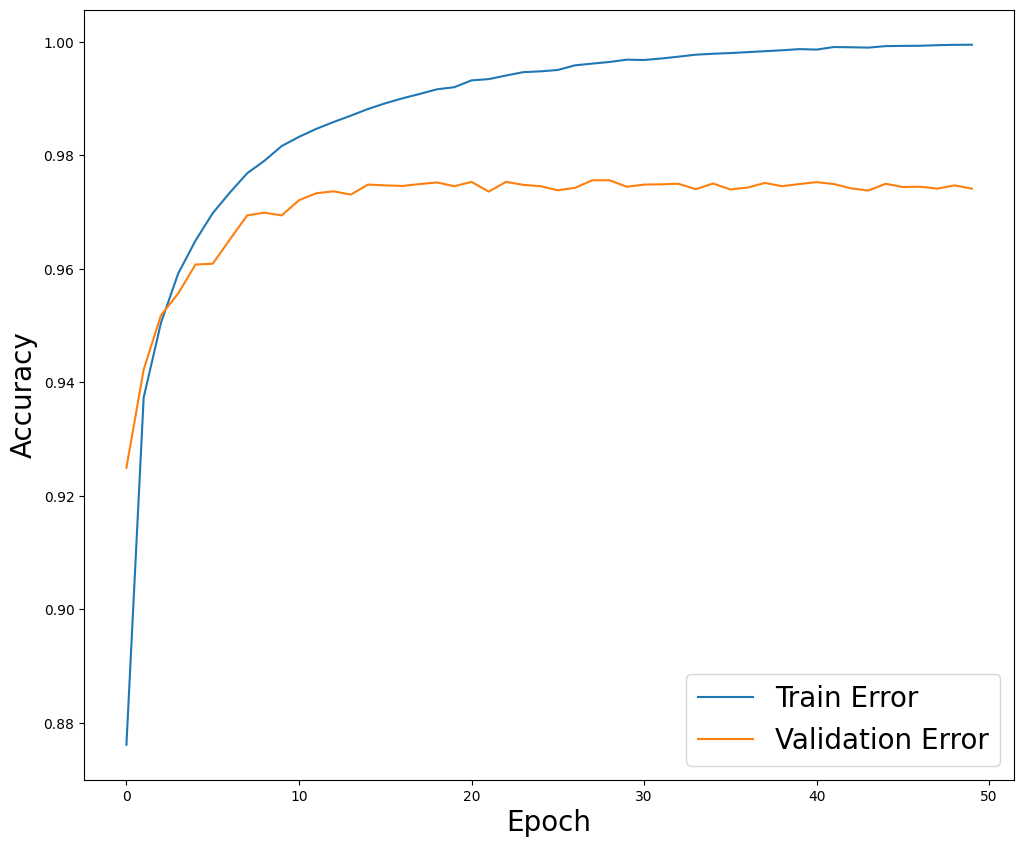

In [15]:

# Adadelta optimizer
adadelta = tf.keras.optimizers.Adadelta(learning_rate = 2e-4)
loss = tf.keras.losses.CategoricalCrossentropy()

ada_model = tf.keras.models.Sequential([
                tf.keras.layers.Dense(100, activation='relu'),
                tf.keras.layers.Dense(100, activation='relu'),
                tf.keras.layers.Dense(10, activation='softmax')])

ada_model.compile(optimizer = adadelta, loss = loss, metrics = ['accuracy'])
history_ada = ada_model.fit(x_train, y_train, batch_size = batch_size, epochs = 50, verbose = 1, callbacks = [early_stop], validation_data = (x_test, y_test))
hist_ada = pd.DataFrame(history_ada.history)
hist_ada['epoch'] = history_ada.epoch
hist_ada[['accuracy', 'val_accuracy']].tail(1)
plot_history(hist_ada)
plot_history(hist_rms)


In [16]:
print("In conclusion, the model with the worst accuracy was the model whose weights were initialized to 0. Right behind it was the Adadelta model with the second worst score, and then the rest of the models all had similar accuracy scores.")

In conclusion, the model with the worst accuracy was the model whose weights were initialized to 0. Right behind it was adadelta model with the second worst score, and then the rest of the models all had similar accuracy scores.
